# Compute performance metrics for the given Y and Y_score without sklearn

In [86]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings(action='ignore')
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
#Solution to Part A

a_5 = pd.read_csv('5_a.csv')
a_5.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
a_5['y'].value_counts()

y
1.0    10000
0.0      100
Name: count, dtype: int64

In [4]:
a_5['y_pred'] = [0 if x < 0.5 else 1 for x in a_5['proba'].values]

In [5]:
a_5.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [6]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for index,row in a_5.iterrows():
    if row['y'] == 1 and row['y_pred'] == 1:
        true_positive +=1
    elif row['y'] == 0 and row['y_pred'] == 0:
        true_negative += 1
    elif row['y'] == 1 and row['y_pred'] == 0:
        false_negative +=1
    else:
        false_positive +=1




In [7]:
print("true positive value is ",true_positive)
print("true negative value is ",true_negative)
print("false postive value is ",false_positive)
print("false negative value is ",false_negative)

true positive value is  10000
true negative value is  0
false postive value is  100
false negative value is  0


In [8]:
precision = true_positive / (true_positive+false_positive)
recall = true_positive / (true_positive+false_negative)

f1_score = (2*precision*recall) / (precision + recall)

print("The F1 score value is ",f1_score)




The F1 score value is  0.9950248756218906


In [9]:
accuracy_score = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)

print("Accuracy score is ",accuracy_score)


Accuracy score is  0.9900990099009901


In [41]:
tpr_array = []
fpr_array = []

threshold_values = np.unique(a_5['proba'],sorted = True)
threshold_values = np.flip(threshold_values)
for threshold in tqdm(threshold_values):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    threshold_outcomes = [0 if x < threshold else 1 for x in a_5['proba'].values]
    for index,row in a_5.iterrows():
        if row['y'] == 1 and threshold_outcomes[index] == 1:
            true_positive +=1
        elif row['y'] == 0 and threshold_outcomes[index] == 0:
            true_negative += 1
        elif row['y'] == 1 and threshold_outcomes[index] == 0:
            false_negative +=1
        else:
            false_positive +=1
            
    tpr = true_positive/(true_positive+false_negative)
    fpr = false_positive/(false_positive+true_negative)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
    

100%|██████████| 10100/10100 [29:51<00:00,  5.64it/s] 


In [43]:
np.trapezoid(tpr_array,fpr_array)

np.float64(0.488299)

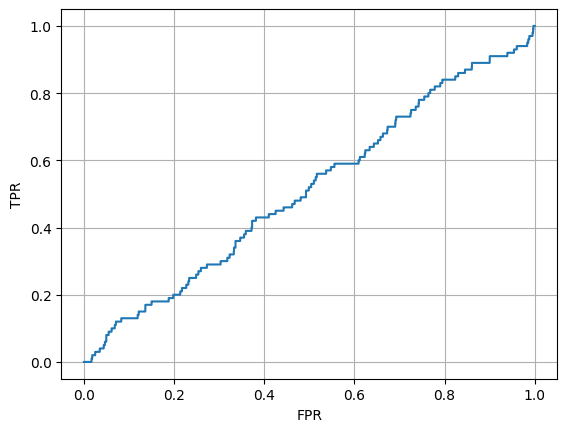

In [52]:
import matplotlib.pyplot as plt
plt.plot(tpr_array,fpr_array)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()

plt.show()

In [47]:
#computation of AUC Score
data = a_5.sort_values(by=['proba'],ascending=False)
tpr = []
fpr = []

for threshold in tqdm(data['proba'].unique()):
    # print("threshol value is ",threshold)
    data['pred'] =np.where( data['proba'] >=  threshold, 1,0)
    
    TP = ((data['y']==1.0) & (data['pred'] == 1.0)).sum() 
    TN = ((data['y']==0.0) & (data['pred'] == 0.0)).sum()
    FP = ((data['y']==0.0) & (data['pred'] == 1.0)).sum()
    FN = ((data['y']==1.0) & (data['pred'] == 0.0)).sum()
    # print("TP TN FP FN",TP,TN,FP,FN)  
    tpr_computed = TP/(TP+FN)
    fpr_computed = FP/(FP+TN)
    print("threshold : ",threshold,"TPR : ",tpr_computed,"TP : ",TP,"FPR : ",fpr_computed,"FP : ",FP)
    tpr.append(tpr_computed)
    fpr.append(fpr_computed)
    

AUC_Score = np.trapz(tpr,fpr)
print('AUROC is ',AUC_Score)

  1%|          | 71/10100 [00:00<00:15, 663.69it/s]

threshold :  0.8999653487823838 TPR :  0.0001 TP :  1 FPR :  0.0 FP :  0
threshold :  0.899828305041011 TPR :  0.0002 TP :  2 FPR :  0.0 FP :  0
threshold :  0.89982484614942 TPR :  0.0003 TP :  3 FPR :  0.0 FP :  0
threshold :  0.8998118120764471 TPR :  0.0004 TP :  4 FPR :  0.0 FP :  0
threshold :  0.8997678816682531 TPR :  0.0005 TP :  5 FPR :  0.0 FP :  0
threshold :  0.8997510420266246 TPR :  0.0006 TP :  6 FPR :  0.0 FP :  0
threshold :  0.8994674890303449 TPR :  0.0007 TP :  7 FPR :  0.0 FP :  0
threshold :  0.8994444889794935 TPR :  0.0008 TP :  8 FPR :  0.0 FP :  0
threshold :  0.899429257722646 TPR :  0.0009 TP :  9 FPR :  0.0 FP :  0
threshold :  0.89941506513672 TPR :  0.001 TP :  10 FPR :  0.0 FP :  0
threshold :  0.8992941132435506 TPR :  0.0011 TP :  11 FPR :  0.0 FP :  0
threshold :  0.8992269895109616 TPR :  0.0012 TP :  12 FPR :  0.0 FP :  0
threshold :  0.8991733184392765 TPR :  0.0013 TP :  13 FPR :  0.0 FP :  0
threshold :  0.8991389752622758 TPR :  0.0014 TP :  14

  2%|▏         | 248/10100 [00:00<00:12, 772.73it/s]

threshold :  0.8929627116013645 TPR :  0.0165 TP :  165 FPR :  0.0 FP :  0
threshold :  0.8929445973086219 TPR :  0.0166 TP :  166 FPR :  0.0 FP :  0
threshold :  0.8929429257314003 TPR :  0.0167 TP :  167 FPR :  0.0 FP :  0
threshold :  0.8929320048531075 TPR :  0.0168 TP :  168 FPR :  0.0 FP :  0
threshold :  0.8928996208437325 TPR :  0.0169 TP :  169 FPR :  0.0 FP :  0
threshold :  0.892888943606795 TPR :  0.017 TP :  170 FPR :  0.0 FP :  0
threshold :  0.8928421253851582 TPR :  0.0171 TP :  171 FPR :  0.0 FP :  0
threshold :  0.8928049238634388 TPR :  0.0172 TP :  172 FPR :  0.0 FP :  0
threshold :  0.8927973137089322 TPR :  0.0172 TP :  172 FPR :  0.01 FP :  1
threshold :  0.8927673410029278 TPR :  0.0173 TP :  173 FPR :  0.01 FP :  1
threshold :  0.8926373607296767 TPR :  0.0174 TP :  174 FPR :  0.01 FP :  1
threshold :  0.892617222015841 TPR :  0.0175 TP :  175 FPR :  0.01 FP :  1
threshold :  0.8925867424388336 TPR :  0.0176 TP :  176 FPR :  0.01 FP :  1
threshold :  0.89240606

  4%|▍         | 430/10100 [00:00<00:11, 835.31it/s]

threshold :  0.8865832087501331 TPR :  0.0327 TP :  327 FPR :  0.03 FP :  3
threshold :  0.8865682334338605 TPR :  0.0328 TP :  328 FPR :  0.03 FP :  3
threshold :  0.886525729493932 TPR :  0.0329 TP :  329 FPR :  0.03 FP :  3
threshold :  0.8864638062443246 TPR :  0.033 TP :  330 FPR :  0.03 FP :  3
threshold :  0.8864546036130834 TPR :  0.0331 TP :  331 FPR :  0.03 FP :  3
threshold :  0.8863681665772344 TPR :  0.0332 TP :  332 FPR :  0.03 FP :  3
threshold :  0.8863538301931403 TPR :  0.0333 TP :  333 FPR :  0.03 FP :  3
threshold :  0.8862876275086662 TPR :  0.0334 TP :  334 FPR :  0.03 FP :  3
threshold :  0.8862356752542375 TPR :  0.0335 TP :  335 FPR :  0.03 FP :  3
threshold :  0.8862277608649616 TPR :  0.0336 TP :  336 FPR :  0.03 FP :  3
threshold :  0.8862042658011526 TPR :  0.0337 TP :  337 FPR :  0.03 FP :  3
threshold :  0.8860726665033481 TPR :  0.0338 TP :  338 FPR :  0.03 FP :  3
threshold :  0.8860249639768856 TPR :  0.0339 TP :  339 FPR :  0.03 FP :  3
threshold :  0

  6%|▌         | 628/10100 [00:00<00:10, 886.94it/s]

threshold :  0.8782306805374498 TPR :  0.0514 TP :  514 FPR :  0.08 FP :  8
threshold :  0.8781912964464439 TPR :  0.0515 TP :  515 FPR :  0.08 FP :  8
threshold :  0.8781782515716788 TPR :  0.0516 TP :  516 FPR :  0.08 FP :  8
threshold :  0.8781444236466005 TPR :  0.0517 TP :  517 FPR :  0.08 FP :  8
threshold :  0.8780813434301169 TPR :  0.0518 TP :  518 FPR :  0.08 FP :  8
threshold :  0.8780414509871506 TPR :  0.0519 TP :  519 FPR :  0.08 FP :  8
threshold :  0.878016889511212 TPR :  0.052 TP :  520 FPR :  0.08 FP :  8
threshold :  0.877970704363616 TPR :  0.0521 TP :  521 FPR :  0.08 FP :  8
threshold :  0.8779220645422429 TPR :  0.0522 TP :  522 FPR :  0.08 FP :  8
threshold :  0.8778822353876303 TPR :  0.0523 TP :  523 FPR :  0.08 FP :  8
threshold :  0.8778754665697468 TPR :  0.0524 TP :  524 FPR :  0.08 FP :  8
threshold :  0.8778583702957065 TPR :  0.0525 TP :  525 FPR :  0.08 FP :  8
threshold :  0.8778383205690923 TPR :  0.0526 TP :  526 FPR :  0.08 FP :  8
threshold :  0.

  8%|▊         | 819/10100 [00:00<00:10, 912.32it/s]

threshold :  0.8698178733352884 TPR :  0.071 TP :  710 FPR :  0.11 FP :  11
threshold :  0.8697951211647473 TPR :  0.0711 TP :  711 FPR :  0.11 FP :  11
threshold :  0.8697821789254393 TPR :  0.0712 TP :  712 FPR :  0.11 FP :  11
threshold :  0.8697742633408694 TPR :  0.0712 TP :  712 FPR :  0.12 FP :  12
threshold :  0.8697515254481925 TPR :  0.0713 TP :  713 FPR :  0.12 FP :  12
threshold :  0.8697341591945973 TPR :  0.0714 TP :  714 FPR :  0.12 FP :  12
threshold :  0.8696778386800681 TPR :  0.0715 TP :  715 FPR :  0.12 FP :  12
threshold :  0.8696322839366548 TPR :  0.0716 TP :  716 FPR :  0.12 FP :  12
threshold :  0.8696243024585231 TPR :  0.0717 TP :  717 FPR :  0.12 FP :  12
threshold :  0.8695938122257103 TPR :  0.0718 TP :  718 FPR :  0.12 FP :  12
threshold :  0.8695020471665564 TPR :  0.0719 TP :  719 FPR :  0.12 FP :  12
threshold :  0.8694840785538795 TPR :  0.072 TP :  720 FPR :  0.12 FP :  12
threshold :  0.8693812823618694 TPR :  0.0721 TP :  721 FPR :  0.12 FP :  12
t

 10%|█         | 1018/10100 [00:01<00:09, 922.73it/s]

threshold :  0.8620371614288708 TPR :  0.091 TP :  910 FPR :  0.13 FP :  13
threshold :  0.8619903264189515 TPR :  0.0911 TP :  911 FPR :  0.13 FP :  13
threshold :  0.8619727985628736 TPR :  0.0912 TP :  912 FPR :  0.13 FP :  13
threshold :  0.8618592499490817 TPR :  0.0913 TP :  913 FPR :  0.13 FP :  13
threshold :  0.861851865795924 TPR :  0.0914 TP :  914 FPR :  0.13 FP :  13
threshold :  0.8618416677900667 TPR :  0.0915 TP :  915 FPR :  0.13 FP :  13
threshold :  0.8618243468890225 TPR :  0.0916 TP :  916 FPR :  0.13 FP :  13
threshold :  0.8617882977559687 TPR :  0.0917 TP :  917 FPR :  0.13 FP :  13
threshold :  0.8617744633239908 TPR :  0.0918 TP :  918 FPR :  0.13 FP :  13
threshold :  0.8617709872196561 TPR :  0.0919 TP :  919 FPR :  0.13 FP :  13
threshold :  0.8617582675142441 TPR :  0.092 TP :  920 FPR :  0.13 FP :  13
threshold :  0.8617236729379616 TPR :  0.0921 TP :  921 FPR :  0.13 FP :  13
threshold :  0.8616999583898732 TPR :  0.0922 TP :  922 FPR :  0.13 FP :  13
th

 12%|█▏        | 1234/10100 [00:01<00:09, 954.74it/s]

threshold :  0.8525815998124923 TPR :  0.1121 TP :  1121 FPR :  0.13 FP :  13
threshold :  0.8525068903204263 TPR :  0.1122 TP :  1122 FPR :  0.13 FP :  13
threshold :  0.8524287310913332 TPR :  0.1123 TP :  1123 FPR :  0.13 FP :  13
threshold :  0.8524007432519962 TPR :  0.1124 TP :  1124 FPR :  0.13 FP :  13
threshold :  0.8523958946885768 TPR :  0.1125 TP :  1125 FPR :  0.13 FP :  13
threshold :  0.8523560581095523 TPR :  0.1126 TP :  1126 FPR :  0.13 FP :  13
threshold :  0.8523175065497806 TPR :  0.1127 TP :  1127 FPR :  0.13 FP :  13
threshold :  0.852282907755034 TPR :  0.1128 TP :  1128 FPR :  0.13 FP :  13
threshold :  0.8522751369211209 TPR :  0.1129 TP :  1129 FPR :  0.13 FP :  13
threshold :  0.8522528119754874 TPR :  0.113 TP :  1130 FPR :  0.13 FP :  13
threshold :  0.8522286469660122 TPR :  0.1131 TP :  1131 FPR :  0.13 FP :  13
threshold :  0.8521648435658344 TPR :  0.1132 TP :  1132 FPR :  0.13 FP :  13
threshold :  0.8521528633259905 TPR :  0.1133 TP :  1133 FPR :  0.

 14%|█▍        | 1424/10100 [00:01<00:09, 902.97it/s]

threshold :  0.8452323732402676 TPR :  0.13 TP :  1300 FPR :  0.15 FP :  15
threshold :  0.8451786556864505 TPR :  0.1301 TP :  1301 FPR :  0.15 FP :  15
threshold :  0.8451499939737603 TPR :  0.1302 TP :  1302 FPR :  0.15 FP :  15
threshold :  0.845138860461177 TPR :  0.1303 TP :  1303 FPR :  0.15 FP :  15
threshold :  0.845081242861963 TPR :  0.1304 TP :  1304 FPR :  0.15 FP :  15
threshold :  0.8449928029086633 TPR :  0.1305 TP :  1305 FPR :  0.15 FP :  15
threshold :  0.844990026171385 TPR :  0.1306 TP :  1306 FPR :  0.15 FP :  15
threshold :  0.8449838129836811 TPR :  0.1307 TP :  1307 FPR :  0.15 FP :  15
threshold :  0.8449622095207869 TPR :  0.1308 TP :  1308 FPR :  0.15 FP :  15
threshold :  0.84489836552948 TPR :  0.1309 TP :  1309 FPR :  0.15 FP :  15
threshold :  0.8448606069815789 TPR :  0.131 TP :  1310 FPR :  0.15 FP :  15
threshold :  0.8448507260563212 TPR :  0.1311 TP :  1311 FPR :  0.15 FP :  15
threshold :  0.8448426691189894 TPR :  0.1312 TP :  1312 FPR :  0.15 FP 

 16%|█▌        | 1611/10100 [00:01<00:09, 918.40it/s]

threshold :  0.8382297282813473 TPR :  0.1467 TP :  1467 FPR :  0.17 FP :  17
threshold :  0.8382265232190105 TPR :  0.1468 TP :  1468 FPR :  0.17 FP :  17
threshold :  0.8381961137074477 TPR :  0.1469 TP :  1469 FPR :  0.17 FP :  17
threshold :  0.8381550540136953 TPR :  0.147 TP :  1470 FPR :  0.17 FP :  17
threshold :  0.8381380826514324 TPR :  0.1471 TP :  1471 FPR :  0.17 FP :  17
threshold :  0.8380961373625234 TPR :  0.1472 TP :  1472 FPR :  0.17 FP :  17
threshold :  0.8380916795014319 TPR :  0.1473 TP :  1473 FPR :  0.17 FP :  17
threshold :  0.8380686328290978 TPR :  0.1474 TP :  1474 FPR :  0.17 FP :  17
threshold :  0.837912430077504 TPR :  0.1475 TP :  1475 FPR :  0.17 FP :  17
threshold :  0.8378068688716567 TPR :  0.1476 TP :  1476 FPR :  0.17 FP :  17
threshold :  0.8377988610642579 TPR :  0.1477 TP :  1477 FPR :  0.17 FP :  17
threshold :  0.8377072412788505 TPR :  0.1478 TP :  1478 FPR :  0.17 FP :  17
threshold :  0.8376531341082742 TPR :  0.1479 TP :  1479 FPR :  0.

 17%|█▋        | 1704/10100 [00:01<00:11, 716.12it/s]

threshold :  0.8302239089141141 TPR :  0.1659 TP :  1659 FPR :  0.18 FP :  18
threshold :  0.8301979446332299 TPR :  0.166 TP :  1660 FPR :  0.18 FP :  18
threshold :  0.8301964109074218 TPR :  0.1661 TP :  1661 FPR :  0.18 FP :  18
threshold :  0.8301791806974337 TPR :  0.1662 TP :  1662 FPR :  0.18 FP :  18
threshold :  0.8301495979468498 TPR :  0.1663 TP :  1663 FPR :  0.18 FP :  18
threshold :  0.8301310593866682 TPR :  0.1664 TP :  1664 FPR :  0.18 FP :  18
threshold :  0.8301098294916124 TPR :  0.1665 TP :  1665 FPR :  0.18 FP :  18
threshold :  0.8300693725174098 TPR :  0.1666 TP :  1666 FPR :  0.18 FP :  18
threshold :  0.829989277922711 TPR :  0.1667 TP :  1667 FPR :  0.18 FP :  18
threshold :  0.8299532151670483 TPR :  0.1668 TP :  1668 FPR :  0.18 FP :  18
threshold :  0.8299157733278926 TPR :  0.1669 TP :  1669 FPR :  0.18 FP :  18
threshold :  0.8299071504538236 TPR :  0.167 TP :  1670 FPR :  0.18 FP :  18
threshold :  0.829804343917113 TPR :  0.1671 TP :  1671 FPR :  0.18

 19%|█▉        | 1907/10100 [00:02<00:09, 839.79it/s]

threshold :  0.8258256222086358 TPR :  0.1765 TP :  1765 FPR :  0.18 FP :  18
threshold :  0.8257944005724387 TPR :  0.1766 TP :  1766 FPR :  0.18 FP :  18
threshold :  0.8257427310829166 TPR :  0.1767 TP :  1767 FPR :  0.18 FP :  18
threshold :  0.8256213259051326 TPR :  0.1768 TP :  1768 FPR :  0.18 FP :  18
threshold :  0.8255930041964159 TPR :  0.1769 TP :  1769 FPR :  0.18 FP :  18
threshold :  0.8255422016430607 TPR :  0.177 TP :  1770 FPR :  0.18 FP :  18
threshold :  0.8255157267463968 TPR :  0.1771 TP :  1771 FPR :  0.18 FP :  18
threshold :  0.8254862261727025 TPR :  0.1772 TP :  1772 FPR :  0.18 FP :  18
threshold :  0.825469409112136 TPR :  0.1773 TP :  1773 FPR :  0.18 FP :  18
threshold :  0.8254211029759679 TPR :  0.1774 TP :  1774 FPR :  0.18 FP :  18
threshold :  0.8253587515653682 TPR :  0.1775 TP :  1775 FPR :  0.18 FP :  18
threshold :  0.8253559412469462 TPR :  0.1776 TP :  1776 FPR :  0.18 FP :  18
threshold :  0.8253492598137571 TPR :  0.1777 TP :  1777 FPR :  0.

 21%|██        | 2114/10100 [00:02<00:08, 922.15it/s]

threshold :  0.8160483842017919 TPR :  0.1981 TP :  1981 FPR :  0.19 FP :  19
threshold :  0.8159932794504626 TPR :  0.1982 TP :  1982 FPR :  0.19 FP :  19
threshold :  0.8159330949939616 TPR :  0.1983 TP :  1983 FPR :  0.19 FP :  19
threshold :  0.8159250252141732 TPR :  0.1984 TP :  1984 FPR :  0.19 FP :  19
threshold :  0.8159246996496312 TPR :  0.1984 TP :  1984 FPR :  0.2 FP :  20
threshold :  0.8159166384886473 TPR :  0.1985 TP :  1985 FPR :  0.2 FP :  20
threshold :  0.8158288297330902 TPR :  0.1986 TP :  1986 FPR :  0.2 FP :  20
threshold :  0.8157587555168099 TPR :  0.1987 TP :  1987 FPR :  0.2 FP :  20
threshold :  0.8157586776776982 TPR :  0.1988 TP :  1988 FPR :  0.2 FP :  20
threshold :  0.815706154940239 TPR :  0.1989 TP :  1989 FPR :  0.2 FP :  20
threshold :  0.8156181600044083 TPR :  0.199 TP :  1990 FPR :  0.2 FP :  20
threshold :  0.8155961762495535 TPR :  0.1991 TP :  1991 FPR :  0.2 FP :  20
threshold :  0.8155217870411896 TPR :  0.1992 TP :  1992 FPR :  0.2 FP :  

 23%|██▎       | 2343/10100 [00:02<00:07, 995.35it/s]

threshold :  0.806709575419098 TPR :  0.2185 TP :  2185 FPR :  0.22 FP :  22
threshold :  0.8066852148467372 TPR :  0.2186 TP :  2186 FPR :  0.22 FP :  22
threshold :  0.8066244335175935 TPR :  0.2187 TP :  2187 FPR :  0.22 FP :  22
threshold :  0.8065862952029729 TPR :  0.2188 TP :  2188 FPR :  0.22 FP :  22
threshold :  0.8065661021033642 TPR :  0.2189 TP :  2189 FPR :  0.22 FP :  22
threshold :  0.8065248860422192 TPR :  0.219 TP :  2190 FPR :  0.22 FP :  22
threshold :  0.8065010567517781 TPR :  0.2191 TP :  2191 FPR :  0.22 FP :  22
threshold :  0.8064644774370004 TPR :  0.2192 TP :  2192 FPR :  0.22 FP :  22
threshold :  0.8064095315401305 TPR :  0.2193 TP :  2193 FPR :  0.22 FP :  22
threshold :  0.8063784659059745 TPR :  0.2194 TP :  2194 FPR :  0.22 FP :  22
threshold :  0.8063671912377375 TPR :  0.2195 TP :  2195 FPR :  0.22 FP :  22
threshold :  0.8063538528311807 TPR :  0.2196 TP :  2196 FPR :  0.22 FP :  22
threshold :  0.8062880218757313 TPR :  0.2197 TP :  2197 FPR :  0.

 26%|██▌       | 2611/10100 [00:02<00:06, 1122.06it/s]

threshold :  0.7980405218098963 TPR :  0.2402 TP :  2402 FPR :  0.25 FP :  25
threshold :  0.797870009203713 TPR :  0.2403 TP :  2403 FPR :  0.25 FP :  25
threshold :  0.7978223130261939 TPR :  0.2404 TP :  2404 FPR :  0.25 FP :  25
threshold :  0.7977981455731529 TPR :  0.2405 TP :  2405 FPR :  0.25 FP :  25
threshold :  0.7977695999407562 TPR :  0.2406 TP :  2406 FPR :  0.25 FP :  25
threshold :  0.797760252139011 TPR :  0.2407 TP :  2407 FPR :  0.25 FP :  25
threshold :  0.7976941365361558 TPR :  0.2408 TP :  2408 FPR :  0.25 FP :  25
threshold :  0.7976736122581214 TPR :  0.2409 TP :  2409 FPR :  0.25 FP :  25
threshold :  0.7975995144700887 TPR :  0.241 TP :  2410 FPR :  0.25 FP :  25
threshold :  0.7975804281122707 TPR :  0.2411 TP :  2411 FPR :  0.25 FP :  25
threshold :  0.7975246223897596 TPR :  0.2412 TP :  2412 FPR :  0.25 FP :  25
threshold :  0.7975133715623259 TPR :  0.2413 TP :  2413 FPR :  0.25 FP :  25
threshold :  0.7974817131122873 TPR :  0.2414 TP :  2414 FPR :  0.2

 28%|██▊       | 2866/10100 [00:03<00:06, 1160.59it/s]

threshold :  0.7877953633848396 TPR :  0.2648 TP :  2648 FPR :  0.28 FP :  28
threshold :  0.7877834463353721 TPR :  0.2649 TP :  2649 FPR :  0.28 FP :  28
threshold :  0.7877100361442624 TPR :  0.265 TP :  2650 FPR :  0.28 FP :  28
threshold :  0.7876459592153662 TPR :  0.2651 TP :  2651 FPR :  0.28 FP :  28
threshold :  0.7875017772169655 TPR :  0.2652 TP :  2652 FPR :  0.28 FP :  28
threshold :  0.7874829423277059 TPR :  0.2653 TP :  2653 FPR :  0.28 FP :  28
threshold :  0.7874479284918585 TPR :  0.2654 TP :  2654 FPR :  0.28 FP :  28
threshold :  0.7874364014473201 TPR :  0.2655 TP :  2655 FPR :  0.28 FP :  28
threshold :  0.7874111791043319 TPR :  0.2656 TP :  2656 FPR :  0.28 FP :  28
threshold :  0.7872438584418704 TPR :  0.2657 TP :  2657 FPR :  0.28 FP :  28
threshold :  0.7872284489362977 TPR :  0.2658 TP :  2658 FPR :  0.28 FP :  28
threshold :  0.7872167916803176 TPR :  0.2659 TP :  2659 FPR :  0.28 FP :  28
threshold :  0.7871607438508008 TPR :  0.266 TP :  2660 FPR :  0.

 30%|██▉       | 2983/10100 [00:03<00:06, 1079.96it/s]

threshold :  0.7768573573763922 TPR :  0.2899 TP :  2899 FPR :  0.29 FP :  29
threshold :  0.7768522960493336 TPR :  0.29 TP :  2900 FPR :  0.29 FP :  29
threshold :  0.7768004710039127 TPR :  0.2901 TP :  2901 FPR :  0.29 FP :  29
threshold :  0.7767000248020963 TPR :  0.2902 TP :  2902 FPR :  0.29 FP :  29
threshold :  0.7766909751085858 TPR :  0.2903 TP :  2903 FPR :  0.29 FP :  29
threshold :  0.7766778423937204 TPR :  0.2904 TP :  2904 FPR :  0.29 FP :  29
threshold :  0.7766642375887078 TPR :  0.2905 TP :  2905 FPR :  0.29 FP :  29
threshold :  0.7766094956026472 TPR :  0.2906 TP :  2906 FPR :  0.29 FP :  29
threshold :  0.7765636696037552 TPR :  0.2907 TP :  2907 FPR :  0.29 FP :  29
threshold :  0.7765311704148421 TPR :  0.2908 TP :  2908 FPR :  0.29 FP :  29
threshold :  0.7765251213600908 TPR :  0.2909 TP :  2909 FPR :  0.29 FP :  29
threshold :  0.7765165951307078 TPR :  0.291 TP :  2910 FPR :  0.29 FP :  29
threshold :  0.776459411113277 TPR :  0.2911 TP :  2911 FPR :  0.29

 32%|███▏      | 3191/10100 [00:03<00:07, 870.06it/s] 

threshold :  0.772134895784888 TPR :  0.3018 TP :  3018 FPR :  0.29 FP :  29
threshold :  0.7720983024279031 TPR :  0.3019 TP :  3019 FPR :  0.29 FP :  29
threshold :  0.7720543720179605 TPR :  0.302 TP :  3020 FPR :  0.29 FP :  29
threshold :  0.772047017106511 TPR :  0.3021 TP :  3021 FPR :  0.29 FP :  29
threshold :  0.772023533693917 TPR :  0.3022 TP :  3022 FPR :  0.29 FP :  29
threshold :  0.7720112319347296 TPR :  0.3023 TP :  3023 FPR :  0.29 FP :  29
threshold :  0.7719612229987871 TPR :  0.3024 TP :  3024 FPR :  0.29 FP :  29
threshold :  0.7719568001315484 TPR :  0.3025 TP :  3025 FPR :  0.29 FP :  29
threshold :  0.7718989491217932 TPR :  0.3026 TP :  3026 FPR :  0.29 FP :  29
threshold :  0.771813051212151 TPR :  0.3027 TP :  3027 FPR :  0.29 FP :  29
threshold :  0.7717913674431452 TPR :  0.3028 TP :  3028 FPR :  0.29 FP :  29
threshold :  0.7717438579162215 TPR :  0.3029 TP :  3029 FPR :  0.29 FP :  29
threshold :  0.7716714251978751 TPR :  0.303 TP :  3030 FPR :  0.29 F

 33%|███▎      | 3285/10100 [00:03<00:08, 783.42it/s]

threshold :  0.7649756010395914 TPR :  0.3213 TP :  3213 FPR :  0.31 FP :  31
threshold :  0.7648991405146071 TPR :  0.3214 TP :  3214 FPR :  0.31 FP :  31
threshold :  0.7648537112870162 TPR :  0.3215 TP :  3215 FPR :  0.31 FP :  31
threshold :  0.7647965013671826 TPR :  0.3216 TP :  3216 FPR :  0.31 FP :  31
threshold :  0.764698895992056 TPR :  0.3217 TP :  3217 FPR :  0.31 FP :  31
threshold :  0.764532156566214 TPR :  0.3218 TP :  3218 FPR :  0.31 FP :  31
threshold :  0.7644558798649557 TPR :  0.3219 TP :  3219 FPR :  0.31 FP :  31
threshold :  0.7644437189471462 TPR :  0.322 TP :  3220 FPR :  0.31 FP :  31
threshold :  0.7644130973588579 TPR :  0.3221 TP :  3221 FPR :  0.31 FP :  31
threshold :  0.764390438544666 TPR :  0.3222 TP :  3222 FPR :  0.31 FP :  31
threshold :  0.7643780147645189 TPR :  0.3223 TP :  3223 FPR :  0.31 FP :  31
threshold :  0.7643689547161854 TPR :  0.3224 TP :  3224 FPR :  0.31 FP :  31
threshold :  0.7643572601149389 TPR :  0.3225 TP :  3225 FPR :  0.31

 34%|███▍      | 3470/10100 [00:03<00:07, 833.37it/s]

threshold :  0.7606199624011925 TPR :  0.3327 TP :  3327 FPR :  0.33 FP :  33
threshold :  0.7606184194882284 TPR :  0.3328 TP :  3328 FPR :  0.33 FP :  33
threshold :  0.7605684624998886 TPR :  0.3329 TP :  3329 FPR :  0.33 FP :  33
threshold :  0.7605616322690796 TPR :  0.333 TP :  3330 FPR :  0.33 FP :  33
threshold :  0.7605420584033615 TPR :  0.3331 TP :  3331 FPR :  0.33 FP :  33
threshold :  0.7604894611702329 TPR :  0.3331 TP :  3331 FPR :  0.34 FP :  34
threshold :  0.7604638152408741 TPR :  0.3332 TP :  3332 FPR :  0.34 FP :  34
threshold :  0.7604459427970182 TPR :  0.3333 TP :  3333 FPR :  0.34 FP :  34
threshold :  0.7604282272671119 TPR :  0.3334 TP :  3334 FPR :  0.34 FP :  34
threshold :  0.760423633986483 TPR :  0.3335 TP :  3335 FPR :  0.34 FP :  34
threshold :  0.7604035858300134 TPR :  0.3336 TP :  3336 FPR :  0.34 FP :  34
threshold :  0.7603978875279443 TPR :  0.3337 TP :  3337 FPR :  0.34 FP :  34
threshold :  0.7603858103924859 TPR :  0.3338 TP :  3338 FPR :  0.

 36%|███▋      | 3678/10100 [00:04<00:07, 898.04it/s]

threshold :  0.7531828455250886 TPR :  0.3526 TP :  3526 FPR :  0.37 FP :  37
threshold :  0.7531603642881269 TPR :  0.3527 TP :  3527 FPR :  0.37 FP :  37
threshold :  0.7531301167238635 TPR :  0.3528 TP :  3528 FPR :  0.37 FP :  37
threshold :  0.7531124643892413 TPR :  0.3529 TP :  3529 FPR :  0.37 FP :  37
threshold :  0.7530870577242184 TPR :  0.353 TP :  3530 FPR :  0.37 FP :  37
threshold :  0.7530814004364679 TPR :  0.3531 TP :  3531 FPR :  0.37 FP :  37
threshold :  0.752984624686615 TPR :  0.3532 TP :  3532 FPR :  0.37 FP :  37
threshold :  0.7529537769031622 TPR :  0.3533 TP :  3533 FPR :  0.37 FP :  37
threshold :  0.7529243051088903 TPR :  0.3534 TP :  3534 FPR :  0.37 FP :  37
threshold :  0.7529080243144388 TPR :  0.3535 TP :  3535 FPR :  0.37 FP :  37
threshold :  0.7528500560391977 TPR :  0.3536 TP :  3536 FPR :  0.37 FP :  37
threshold :  0.7528082613340801 TPR :  0.3537 TP :  3537 FPR :  0.37 FP :  37
threshold :  0.7527428369494942 TPR :  0.3538 TP :  3538 FPR :  0.

 39%|███▊      | 3889/10100 [00:04<00:06, 947.46it/s]

threshold :  0.7458259834639318 TPR :  0.3732 TP :  3732 FPR :  0.4 FP :  40
threshold :  0.7457731228385998 TPR :  0.3733 TP :  3733 FPR :  0.4 FP :  40
threshold :  0.7457506944023626 TPR :  0.3733 TP :  3733 FPR :  0.41 FP :  41
threshold :  0.7457036066552654 TPR :  0.3733 TP :  3733 FPR :  0.42 FP :  42
threshold :  0.7456203449030889 TPR :  0.3734 TP :  3734 FPR :  0.42 FP :  42
threshold :  0.7456192284897539 TPR :  0.3735 TP :  3735 FPR :  0.42 FP :  42
threshold :  0.7455953104506896 TPR :  0.3736 TP :  3736 FPR :  0.42 FP :  42
threshold :  0.7455750396308877 TPR :  0.3737 TP :  3737 FPR :  0.42 FP :  42
threshold :  0.7455732288135996 TPR :  0.3738 TP :  3738 FPR :  0.42 FP :  42
threshold :  0.7455681382824727 TPR :  0.3739 TP :  3739 FPR :  0.42 FP :  42
threshold :  0.7455408040655127 TPR :  0.374 TP :  3740 FPR :  0.42 FP :  42
threshold :  0.7455015410124197 TPR :  0.3741 TP :  3741 FPR :  0.42 FP :  42
threshold :  0.7454722568751753 TPR :  0.3742 TP :  3742 FPR :  0.4

 41%|████      | 4098/10100 [00:04<00:06, 977.42it/s]

threshold :  0.7373796352984398 TPR :  0.3945 TP :  3945 FPR :  0.43 FP :  43
threshold :  0.7373533823485109 TPR :  0.3946 TP :  3946 FPR :  0.43 FP :  43
threshold :  0.7373092069520465 TPR :  0.3947 TP :  3947 FPR :  0.43 FP :  43
threshold :  0.7372542888770843 TPR :  0.3948 TP :  3948 FPR :  0.43 FP :  43
threshold :  0.7372495555266209 TPR :  0.3949 TP :  3949 FPR :  0.43 FP :  43
threshold :  0.7372464478396905 TPR :  0.395 TP :  3950 FPR :  0.43 FP :  43
threshold :  0.7372073791008799 TPR :  0.3951 TP :  3951 FPR :  0.43 FP :  43
threshold :  0.7371550657142055 TPR :  0.3952 TP :  3952 FPR :  0.43 FP :  43
threshold :  0.7371250569626094 TPR :  0.3953 TP :  3953 FPR :  0.43 FP :  43
threshold :  0.7370507820164188 TPR :  0.3954 TP :  3954 FPR :  0.43 FP :  43
threshold :  0.7369740850723556 TPR :  0.3955 TP :  3955 FPR :  0.43 FP :  43
threshold :  0.7369600185897229 TPR :  0.3956 TP :  3956 FPR :  0.43 FP :  43
threshold :  0.736948813575702 TPR :  0.3957 TP :  3957 FPR :  0.

 43%|████▎     | 4312/10100 [00:04<00:05, 1009.98it/s]

threshold :  0.7296174300844556 TPR :  0.4142 TP :  4142 FPR :  0.44 FP :  44
threshold :  0.7295650589900887 TPR :  0.4143 TP :  4143 FPR :  0.44 FP :  44
threshold :  0.7295567840008924 TPR :  0.4144 TP :  4144 FPR :  0.44 FP :  44
threshold :  0.729525506675034 TPR :  0.4145 TP :  4145 FPR :  0.44 FP :  44
threshold :  0.7294686715120384 TPR :  0.4146 TP :  4146 FPR :  0.44 FP :  44
threshold :  0.7294130984151062 TPR :  0.4147 TP :  4147 FPR :  0.44 FP :  44
threshold :  0.7293939302717898 TPR :  0.4148 TP :  4148 FPR :  0.44 FP :  44
threshold :  0.7293932565222822 TPR :  0.4149 TP :  4149 FPR :  0.44 FP :  44
threshold :  0.7293647323086843 TPR :  0.415 TP :  4150 FPR :  0.44 FP :  44
threshold :  0.7292743017665327 TPR :  0.4151 TP :  4151 FPR :  0.44 FP :  44
threshold :  0.7292603420963993 TPR :  0.4152 TP :  4152 FPR :  0.44 FP :  44
threshold :  0.7291663417738976 TPR :  0.4153 TP :  4153 FPR :  0.44 FP :  44
threshold :  0.7290276108912827 TPR :  0.4154 TP :  4154 FPR :  0.

 45%|████▍     | 4531/10100 [00:04<00:05, 1036.88it/s]

threshold :  0.7221613976689624 TPR :  0.434 TP :  4340 FPR :  0.45 FP :  45
threshold :  0.7221169872783516 TPR :  0.4341 TP :  4341 FPR :  0.45 FP :  45
threshold :  0.7221119089896436 TPR :  0.4342 TP :  4342 FPR :  0.45 FP :  45
threshold :  0.7220985037881376 TPR :  0.4343 TP :  4343 FPR :  0.45 FP :  45
threshold :  0.7220402607511068 TPR :  0.4344 TP :  4344 FPR :  0.45 FP :  45
threshold :  0.7220328099976489 TPR :  0.4345 TP :  4345 FPR :  0.45 FP :  45
threshold :  0.7220062652124091 TPR :  0.4346 TP :  4346 FPR :  0.45 FP :  45
threshold :  0.7219830816790285 TPR :  0.4347 TP :  4347 FPR :  0.45 FP :  45
threshold :  0.7218377692513884 TPR :  0.4348 TP :  4348 FPR :  0.45 FP :  45
threshold :  0.7217565517205238 TPR :  0.4349 TP :  4349 FPR :  0.45 FP :  45
threshold :  0.72166422122313 TPR :  0.435 TP :  4350 FPR :  0.45 FP :  45
threshold :  0.7215723580830514 TPR :  0.4351 TP :  4351 FPR :  0.45 FP :  45
threshold :  0.721538352901698 TPR :  0.4352 TP :  4352 FPR :  0.45 

 46%|████▌     | 4648/10100 [00:04<00:05, 1072.94it/s]

threshold :  0.7131218786021704 TPR :  0.4566 TP :  4566 FPR :  0.46 FP :  46
threshold :  0.7130389268792904 TPR :  0.4567 TP :  4567 FPR :  0.46 FP :  46
threshold :  0.71300451092946 TPR :  0.4568 TP :  4568 FPR :  0.46 FP :  46
threshold :  0.7129874193842711 TPR :  0.4569 TP :  4569 FPR :  0.46 FP :  46
threshold :  0.7129702137545932 TPR :  0.457 TP :  4570 FPR :  0.46 FP :  46
threshold :  0.7128619491739348 TPR :  0.4571 TP :  4571 FPR :  0.46 FP :  46
threshold :  0.7128618823957691 TPR :  0.4572 TP :  4572 FPR :  0.46 FP :  46
threshold :  0.712851559551988 TPR :  0.4573 TP :  4573 FPR :  0.46 FP :  46
threshold :  0.712845601564471 TPR :  0.4574 TP :  4574 FPR :  0.46 FP :  46
threshold :  0.7127753450325369 TPR :  0.4575 TP :  4575 FPR :  0.46 FP :  46
threshold :  0.7127606806237903 TPR :  0.4576 TP :  4576 FPR :  0.46 FP :  46
threshold :  0.7127400234363409 TPR :  0.4577 TP :  4577 FPR :  0.46 FP :  46
threshold :  0.7127078444210494 TPR :  0.4578 TP :  4578 FPR :  0.46 

 48%|████▊     | 4855/10100 [00:05<00:05, 897.46it/s] 

threshold :  0.7076880712095923 TPR :  0.4706 TP :  4706 FPR :  0.48 FP :  48
threshold :  0.7076740112880816 TPR :  0.4707 TP :  4707 FPR :  0.48 FP :  48
threshold :  0.7075277077202164 TPR :  0.4708 TP :  4708 FPR :  0.48 FP :  48
threshold :  0.7075242998924651 TPR :  0.4709 TP :  4709 FPR :  0.48 FP :  48
threshold :  0.7074802476272002 TPR :  0.471 TP :  4710 FPR :  0.48 FP :  48
threshold :  0.707389864457175 TPR :  0.4711 TP :  4711 FPR :  0.48 FP :  48
threshold :  0.7073409274736603 TPR :  0.4712 TP :  4712 FPR :  0.48 FP :  48
threshold :  0.7072965390196381 TPR :  0.4713 TP :  4713 FPR :  0.48 FP :  48
threshold :  0.7071973443442958 TPR :  0.4714 TP :  4714 FPR :  0.48 FP :  48
threshold :  0.7071933211007893 TPR :  0.4715 TP :  4715 FPR :  0.48 FP :  48
threshold :  0.7071868896683726 TPR :  0.4716 TP :  4716 FPR :  0.48 FP :  48
threshold :  0.7071595434504567 TPR :  0.4717 TP :  4717 FPR :  0.48 FP :  48
threshold :  0.7071549769221521 TPR :  0.4718 TP :  4718 FPR :  0.

 51%|█████     | 5102/10100 [00:05<00:05, 996.19it/s] 

threshold :  0.698850062255543 TPR :  0.4947 TP :  4947 FPR :  0.51 FP :  51
threshold :  0.698842961171666 TPR :  0.4948 TP :  4948 FPR :  0.51 FP :  51
threshold :  0.6987775260888347 TPR :  0.4949 TP :  4949 FPR :  0.51 FP :  51
threshold :  0.6987738984053377 TPR :  0.495 TP :  4950 FPR :  0.51 FP :  51
threshold :  0.6987550427714949 TPR :  0.4951 TP :  4951 FPR :  0.51 FP :  51
threshold :  0.6987184454407595 TPR :  0.4952 TP :  4952 FPR :  0.51 FP :  51
threshold :  0.698669399416896 TPR :  0.4953 TP :  4953 FPR :  0.51 FP :  51
threshold :  0.6986224829448601 TPR :  0.4954 TP :  4954 FPR :  0.51 FP :  51
threshold :  0.6986039081839571 TPR :  0.4955 TP :  4955 FPR :  0.51 FP :  51
threshold :  0.6985685136133755 TPR :  0.4956 TP :  4956 FPR :  0.51 FP :  51
threshold :  0.6985583111135768 TPR :  0.4957 TP :  4957 FPR :  0.51 FP :  51
threshold :  0.6985579098709802 TPR :  0.4958 TP :  4958 FPR :  0.51 FP :  51
threshold :  0.6985533853889331 TPR :  0.4959 TP :  4959 FPR :  0.51

 53%|█████▎    | 5303/10100 [00:05<00:05, 928.57it/s]

threshold :  0.6922626396969851 TPR :  0.5134 TP :  5134 FPR :  0.54 FP :  54
threshold :  0.69220455071692 TPR :  0.5135 TP :  5135 FPR :  0.54 FP :  54
threshold :  0.6920996111763527 TPR :  0.5136 TP :  5136 FPR :  0.54 FP :  54
threshold :  0.6920988931272146 TPR :  0.5137 TP :  5137 FPR :  0.54 FP :  54
threshold :  0.6920982725002457 TPR :  0.5138 TP :  5138 FPR :  0.54 FP :  54
threshold :  0.6920675385033264 TPR :  0.5139 TP :  5139 FPR :  0.54 FP :  54
threshold :  0.6919814762068333 TPR :  0.514 TP :  5140 FPR :  0.54 FP :  54
threshold :  0.6918851620419454 TPR :  0.5141 TP :  5141 FPR :  0.54 FP :  54
threshold :  0.6918616745758034 TPR :  0.5142 TP :  5142 FPR :  0.54 FP :  54
threshold :  0.6918585626827463 TPR :  0.5143 TP :  5143 FPR :  0.54 FP :  54
threshold :  0.6918543833976459 TPR :  0.5143 TP :  5143 FPR :  0.55 FP :  55
threshold :  0.6917353675360816 TPR :  0.5144 TP :  5144 FPR :  0.55 FP :  55
threshold :  0.6917082153386326 TPR :  0.5145 TP :  5145 FPR :  0.5

 55%|█████▍    | 5514/10100 [00:05<00:04, 968.25it/s]

threshold :  0.6838966319552304 TPR :  0.534 TP :  5340 FPR :  0.56 FP :  56
threshold :  0.6838782582397505 TPR :  0.5341 TP :  5341 FPR :  0.56 FP :  56
threshold :  0.68383005225995 TPR :  0.5342 TP :  5342 FPR :  0.56 FP :  56
threshold :  0.6837983112478084 TPR :  0.5343 TP :  5343 FPR :  0.56 FP :  56
threshold :  0.683790802705146 TPR :  0.5344 TP :  5344 FPR :  0.56 FP :  56
threshold :  0.6837806753381265 TPR :  0.5345 TP :  5345 FPR :  0.56 FP :  56
threshold :  0.6837593155406166 TPR :  0.5346 TP :  5346 FPR :  0.56 FP :  56
threshold :  0.6837087700246501 TPR :  0.5347 TP :  5347 FPR :  0.56 FP :  56
threshold :  0.6836920534864792 TPR :  0.5348 TP :  5348 FPR :  0.56 FP :  56
threshold :  0.6836894481475249 TPR :  0.5349 TP :  5349 FPR :  0.56 FP :  56
threshold :  0.68368090634071 TPR :  0.535 TP :  5350 FPR :  0.56 FP :  56
threshold :  0.6835933550746535 TPR :  0.5351 TP :  5351 FPR :  0.56 FP :  56
threshold :  0.6835873657363433 TPR :  0.5352 TP :  5352 FPR :  0.56 FP

 57%|█████▋    | 5749/10100 [00:06<00:04, 1035.47it/s]

threshold :  0.6755515013131208 TPR :  0.5565 TP :  5565 FPR :  0.59 FP :  59
threshold :  0.6755425671898253 TPR :  0.5566 TP :  5566 FPR :  0.59 FP :  59
threshold :  0.6754981115497111 TPR :  0.5567 TP :  5567 FPR :  0.59 FP :  59
threshold :  0.6754958582308551 TPR :  0.5568 TP :  5568 FPR :  0.59 FP :  59
threshold :  0.6754244536345557 TPR :  0.5569 TP :  5569 FPR :  0.59 FP :  59
threshold :  0.6754053206058799 TPR :  0.557 TP :  5570 FPR :  0.59 FP :  59
threshold :  0.6753514230259318 TPR :  0.5571 TP :  5571 FPR :  0.59 FP :  59
threshold :  0.6753253758652806 TPR :  0.5572 TP :  5572 FPR :  0.59 FP :  59
threshold :  0.6752871078394971 TPR :  0.5573 TP :  5573 FPR :  0.59 FP :  59
threshold :  0.6752778758545965 TPR :  0.5574 TP :  5574 FPR :  0.59 FP :  59
threshold :  0.6752444819986971 TPR :  0.5575 TP :  5575 FPR :  0.59 FP :  59
threshold :  0.6752218560691106 TPR :  0.5576 TP :  5576 FPR :  0.59 FP :  59
threshold :  0.675218062191777 TPR :  0.5577 TP :  5577 FPR :  0.

 60%|██████    | 6093/10100 [00:06<00:03, 1091.02it/s]

threshold :  0.6663225797608214 TPR :  0.58 TP :  5800 FPR :  0.59 FP :  59
threshold :  0.666322367897077 TPR :  0.5801 TP :  5801 FPR :  0.59 FP :  59
threshold :  0.6662936279898068 TPR :  0.5802 TP :  5802 FPR :  0.59 FP :  59
threshold :  0.6662874971978254 TPR :  0.5803 TP :  5803 FPR :  0.59 FP :  59
threshold :  0.6662686968092719 TPR :  0.5804 TP :  5804 FPR :  0.59 FP :  59
threshold :  0.6661977145707976 TPR :  0.5805 TP :  5805 FPR :  0.59 FP :  59
threshold :  0.6661529122402381 TPR :  0.5806 TP :  5806 FPR :  0.59 FP :  59
threshold :  0.6661423449227835 TPR :  0.5807 TP :  5807 FPR :  0.59 FP :  59
threshold :  0.666125347578936 TPR :  0.5808 TP :  5808 FPR :  0.59 FP :  59
threshold :  0.6661232389072975 TPR :  0.5809 TP :  5809 FPR :  0.59 FP :  59
threshold :  0.666027385964372 TPR :  0.581 TP :  5810 FPR :  0.59 FP :  59
threshold :  0.6659988760281464 TPR :  0.5811 TP :  5811 FPR :  0.59 FP :  59
threshold :  0.6658930467166541 TPR :  0.5812 TP :  5812 FPR :  0.59 F

 61%|██████▏   | 6203/10100 [00:06<00:03, 1042.05it/s]

threshold :  0.6576351069644816 TPR :  0.6035 TP :  6035 FPR :  0.59 FP :  59
threshold :  0.6575935746794808 TPR :  0.6036 TP :  6036 FPR :  0.59 FP :  59
threshold :  0.6575625108861799 TPR :  0.6037 TP :  6037 FPR :  0.59 FP :  59
threshold :  0.6575183847617118 TPR :  0.6038 TP :  6038 FPR :  0.59 FP :  59
threshold :  0.6575054298538784 TPR :  0.6039 TP :  6039 FPR :  0.59 FP :  59
threshold :  0.6575031491841049 TPR :  0.604 TP :  6040 FPR :  0.59 FP :  59
threshold :  0.6575014622880059 TPR :  0.6041 TP :  6041 FPR :  0.59 FP :  59
threshold :  0.65748928873183 TPR :  0.6042 TP :  6042 FPR :  0.59 FP :  59
threshold :  0.6573883591094158 TPR :  0.6043 TP :  6043 FPR :  0.59 FP :  59
threshold :  0.6573300838909959 TPR :  0.6044 TP :  6044 FPR :  0.59 FP :  59
threshold :  0.657308936397265 TPR :  0.6045 TP :  6045 FPR :  0.59 FP :  59
threshold :  0.6572570739685978 TPR :  0.6046 TP :  6046 FPR :  0.59 FP :  59
threshold :  0.657255256783515 TPR :  0.6047 TP :  6047 FPR :  0.59 

 63%|██████▎   | 6413/10100 [00:06<00:04, 845.01it/s] 

 0.61 FP :  61
threshold :  0.6525806764607252 TPR :  0.6162 TP :  6162 FPR :  0.61 FP :  61
threshold :  0.6525585572411778 TPR :  0.6163 TP :  6163 FPR :  0.61 FP :  61
threshold :  0.6525186922855974 TPR :  0.6164 TP :  6164 FPR :  0.61 FP :  61
threshold :  0.6524538129690522 TPR :  0.6165 TP :  6165 FPR :  0.61 FP :  61
threshold :  0.6523633914683657 TPR :  0.6166 TP :  6166 FPR :  0.61 FP :  61
threshold :  0.6522883145812974 TPR :  0.6167 TP :  6167 FPR :  0.61 FP :  61
threshold :  0.6522596763619323 TPR :  0.6168 TP :  6168 FPR :  0.61 FP :  61
threshold :  0.6522513411931213 TPR :  0.6169 TP :  6169 FPR :  0.61 FP :  61
threshold :  0.6522018032449454 TPR :  0.617 TP :  6170 FPR :  0.61 FP :  61
threshold :  0.6521884671721511 TPR :  0.6171 TP :  6171 FPR :  0.61 FP :  61
threshold :  0.6521812242780824 TPR :  0.6172 TP :  6172 FPR :  0.61 FP :  61
threshold :  0.6521770836406683 TPR :  0.6173 TP :  6173 FPR :  0.61 FP :  61
threshold :  0.6520899600354703 TPR :  0.6174 TP :

 65%|██████▌   | 6607/10100 [00:07<00:03, 902.18it/s]

threshold :  0.6443658005773049 TPR :  0.635 TP :  6350 FPR :  0.64 FP :  64
threshold :  0.6443643654753818 TPR :  0.6351 TP :  6351 FPR :  0.64 FP :  64
threshold :  0.6443442607859976 TPR :  0.6352 TP :  6352 FPR :  0.64 FP :  64
threshold :  0.6442756645655029 TPR :  0.6353 TP :  6353 FPR :  0.64 FP :  64
threshold :  0.6442612911831082 TPR :  0.6354 TP :  6354 FPR :  0.64 FP :  64
threshold :  0.6442422125431853 TPR :  0.6355 TP :  6355 FPR :  0.64 FP :  64
threshold :  0.6442313163416066 TPR :  0.6356 TP :  6356 FPR :  0.64 FP :  64
threshold :  0.6441928131917687 TPR :  0.6357 TP :  6357 FPR :  0.64 FP :  64
threshold :  0.6441565765805957 TPR :  0.6358 TP :  6358 FPR :  0.64 FP :  64
threshold :  0.644103696798524 TPR :  0.6359 TP :  6359 FPR :  0.64 FP :  64
threshold :  0.644034128063719 TPR :  0.636 TP :  6360 FPR :  0.64 FP :  64
threshold :  0.6439496447621802 TPR :  0.6361 TP :  6361 FPR :  0.64 FP :  64
threshold :  0.6438801613398588 TPR :  0.6362 TP :  6362 FPR :  0.64

 66%|██████▋   | 6703/10100 [00:07<00:03, 878.54it/s]

threshold :  0.6375045647168702 TPR :  0.6542 TP :  6542 FPR :  0.66 FP :  66
threshold :  0.6374904689998031 TPR :  0.6543 TP :  6543 FPR :  0.66 FP :  66
threshold :  0.637425520348872 TPR :  0.6544 TP :  6544 FPR :  0.66 FP :  66
threshold :  0.6373866237658206 TPR :  0.6545 TP :  6545 FPR :  0.66 FP :  66
threshold :  0.6372682191615942 TPR :  0.6546 TP :  6546 FPR :  0.66 FP :  66
threshold :  0.6372018105741386 TPR :  0.6547 TP :  6547 FPR :  0.66 FP :  66
threshold :  0.6371920634409594 TPR :  0.6548 TP :  6548 FPR :  0.66 FP :  66
threshold :  0.6371774972585982 TPR :  0.6549 TP :  6549 FPR :  0.66 FP :  66
threshold :  0.6371473961924938 TPR :  0.655 TP :  6550 FPR :  0.66 FP :  66
threshold :  0.6371228370569012 TPR :  0.6551 TP :  6551 FPR :  0.66 FP :  66
threshold :  0.6370320614509206 TPR :  0.6552 TP :  6552 FPR :  0.66 FP :  66
threshold :  0.6370158628201994 TPR :  0.6553 TP :  6553 FPR :  0.66 FP :  66
threshold :  0.6369896599062553 TPR :  0.6554 TP :  6554 FPR :  0.

 68%|██████▊   | 6889/10100 [00:07<00:03, 898.00it/s]

threshold :  0.6308804612882016 TPR :  0.6722 TP :  6722 FPR :  0.68 FP :  68
threshold :  0.630842924378294 TPR :  0.6723 TP :  6723 FPR :  0.68 FP :  68
threshold :  0.6308401481455922 TPR :  0.6724 TP :  6724 FPR :  0.68 FP :  68
threshold :  0.6308329016384395 TPR :  0.6725 TP :  6725 FPR :  0.68 FP :  68
threshold :  0.6308171896315766 TPR :  0.6726 TP :  6726 FPR :  0.68 FP :  68
threshold :  0.6307566893423621 TPR :  0.6727 TP :  6727 FPR :  0.68 FP :  68
threshold :  0.630754285184457 TPR :  0.6728 TP :  6728 FPR :  0.68 FP :  68
threshold :  0.6307015584858215 TPR :  0.6728 TP :  6728 FPR :  0.69 FP :  69
threshold :  0.6306720463430149 TPR :  0.6729 TP :  6729 FPR :  0.69 FP :  69
threshold :  0.6305488983624068 TPR :  0.673 TP :  6730 FPR :  0.69 FP :  69
threshold :  0.6305446589672384 TPR :  0.6731 TP :  6731 FPR :  0.69 FP :  69
threshold :  0.630449962662777 TPR :  0.6732 TP :  6732 FPR :  0.69 FP :  69
threshold :  0.6304301577551005 TPR :  0.6733 TP :  6733 FPR :  0.69

 69%|██████▉   | 7001/10100 [00:07<00:03, 930.93it/s]

threshold :  0.6230807477828071 TPR :  0.6914 TP :  6914 FPR :  0.72 FP :  72
threshold :  0.6230235201109666 TPR :  0.6915 TP :  6915 FPR :  0.72 FP :  72
threshold :  0.6230213127907459 TPR :  0.6916 TP :  6916 FPR :  0.72 FP :  72
threshold :  0.622976938718735 TPR :  0.6917 TP :  6917 FPR :  0.72 FP :  72
threshold :  0.6229706312777623 TPR :  0.6918 TP :  6918 FPR :  0.72 FP :  72
threshold :  0.622948420675426 TPR :  0.6919 TP :  6919 FPR :  0.72 FP :  72
threshold :  0.6228526133375442 TPR :  0.692 TP :  6920 FPR :  0.72 FP :  72
threshold :  0.6228503854439388 TPR :  0.6921 TP :  6921 FPR :  0.72 FP :  72
threshold :  0.6228297614499437 TPR :  0.6922 TP :  6922 FPR :  0.72 FP :  72
threshold :  0.6228010951516689 TPR :  0.6923 TP :  6923 FPR :  0.72 FP :  72
threshold :  0.6227781064801057 TPR :  0.6924 TP :  6924 FPR :  0.72 FP :  72
threshold :  0.6227376799117496 TPR :  0.6925 TP :  6925 FPR :  0.72 FP :  72
threshold :  0.6227194546525971 TPR :  0.6926 TP :  6926 FPR :  0.7

 71%|███████   | 7177/10100 [00:07<00:04, 638.38it/s]

threshold :  0.619226109285683 TPR :  0.7014 TP :  7014 FPR :  0.73 FP :  73
threshold :  0.6192140661780894 TPR :  0.7015 TP :  7015 FPR :  0.73 FP :  73
threshold :  0.6191577354775586 TPR :  0.7016 TP :  7016 FPR :  0.73 FP :  73
threshold :  0.6191384636469481 TPR :  0.7017 TP :  7017 FPR :  0.73 FP :  73
threshold :  0.6191271097366813 TPR :  0.7018 TP :  7018 FPR :  0.73 FP :  73
threshold :  0.6191021174913918 TPR :  0.7019 TP :  7019 FPR :  0.73 FP :  73
threshold :  0.6190837767826027 TPR :  0.702 TP :  7020 FPR :  0.73 FP :  73
threshold :  0.6189587881855698 TPR :  0.7021 TP :  7021 FPR :  0.73 FP :  73
threshold :  0.6189396399701794 TPR :  0.7022 TP :  7022 FPR :  0.73 FP :  73
threshold :  0.6188859818624456 TPR :  0.7023 TP :  7023 FPR :  0.73 FP :  73
threshold :  0.618879686111916 TPR :  0.7024 TP :  7024 FPR :  0.73 FP :  73
threshold :  0.618860669817829 TPR :  0.7025 TP :  7025 FPR :  0.73 FP :  73
threshold :  0.6188065658046659 TPR :  0.7026 TP :  7026 FPR :  0.73

 73%|███████▎  | 7418/10100 [00:08<00:03, 854.04it/s]

threshold :  0.6136847462567465 TPR :  0.7155 TP :  7155 FPR :  0.73 FP :  73
threshold :  0.6136554639651025 TPR :  0.7156 TP :  7156 FPR :  0.73 FP :  73
threshold :  0.613649967274222 TPR :  0.7157 TP :  7157 FPR :  0.73 FP :  73
threshold :  0.613637968569522 TPR :  0.7158 TP :  7158 FPR :  0.73 FP :  73
threshold :  0.6135885022111571 TPR :  0.7159 TP :  7159 FPR :  0.73 FP :  73
threshold :  0.6135591219118999 TPR :  0.716 TP :  7160 FPR :  0.73 FP :  73
threshold :  0.6135043937172816 TPR :  0.7161 TP :  7161 FPR :  0.73 FP :  73
threshold :  0.6134888871370948 TPR :  0.7162 TP :  7162 FPR :  0.73 FP :  73
threshold :  0.6134624615557491 TPR :  0.7163 TP :  7163 FPR :  0.73 FP :  73
threshold :  0.6133966758873244 TPR :  0.7164 TP :  7164 FPR :  0.73 FP :  73
threshold :  0.6133951109819108 TPR :  0.7165 TP :  7165 FPR :  0.73 FP :  73
threshold :  0.6133833095082787 TPR :  0.7166 TP :  7166 FPR :  0.73 FP :  73
threshold :  0.6133449813631783 TPR :  0.7167 TP :  7167 FPR :  0.7

 76%|███████▌  | 7649/10100 [00:08<00:02, 958.59it/s]

threshold :  0.6050446678786167 TPR :  0.7379 TP :  7379 FPR :  0.76 FP :  76
threshold :  0.6050078558391673 TPR :  0.738 TP :  7380 FPR :  0.76 FP :  76
threshold :  0.6049793705202275 TPR :  0.7381 TP :  7381 FPR :  0.76 FP :  76
threshold :  0.6049344035227562 TPR :  0.7382 TP :  7382 FPR :  0.76 FP :  76
threshold :  0.6048833393730056 TPR :  0.7383 TP :  7383 FPR :  0.76 FP :  76
threshold :  0.6048472885466638 TPR :  0.7384 TP :  7384 FPR :  0.76 FP :  76
threshold :  0.6048069868493702 TPR :  0.7385 TP :  7385 FPR :  0.76 FP :  76
threshold :  0.6047823582188273 TPR :  0.7386 TP :  7386 FPR :  0.76 FP :  76
threshold :  0.6047715303336957 TPR :  0.7387 TP :  7387 FPR :  0.76 FP :  76
threshold :  0.6047710191717968 TPR :  0.7388 TP :  7388 FPR :  0.76 FP :  76
threshold :  0.6047206246483292 TPR :  0.7389 TP :  7389 FPR :  0.76 FP :  76
threshold :  0.6046979523991478 TPR :  0.739 TP :  7390 FPR :  0.76 FP :  76
threshold :  0.6046944717143397 TPR :  0.7391 TP :  7391 FPR :  0.

 77%|███████▋  | 7749/10100 [00:08<00:02, 954.77it/s]

threshold :  0.5973042822709216 TPR :  0.7572 TP :  7572 FPR :  0.79 FP :  79
threshold :  0.5972853671695945 TPR :  0.7573 TP :  7573 FPR :  0.79 FP :  79
threshold :  0.5971970571337315 TPR :  0.7574 TP :  7574 FPR :  0.79 FP :  79
threshold :  0.5971864228241186 TPR :  0.7575 TP :  7575 FPR :  0.79 FP :  79
threshold :  0.5971653344321838 TPR :  0.7576 TP :  7576 FPR :  0.79 FP :  79
threshold :  0.5971597109545626 TPR :  0.7577 TP :  7577 FPR :  0.79 FP :  79
threshold :  0.5971433945670745 TPR :  0.7578 TP :  7578 FPR :  0.79 FP :  79
threshold :  0.597123188089947 TPR :  0.7579 TP :  7579 FPR :  0.79 FP :  79
threshold :  0.5971065831807644 TPR :  0.758 TP :  7580 FPR :  0.79 FP :  79
threshold :  0.5970606938694052 TPR :  0.7581 TP :  7581 FPR :  0.79 FP :  79
threshold :  0.5970550071483133 TPR :  0.7582 TP :  7582 FPR :  0.79 FP :  79
threshold :  0.5970449855125471 TPR :  0.7583 TP :  7583 FPR :  0.79 FP :  79
threshold :  0.5969275163741866 TPR :  0.7584 TP :  7584 FPR :  0.

 79%|███████▉  | 7973/10100 [00:08<00:02, 978.98it/s]

threshold :  0.5878063736368798 TPR :  0.7769 TP :  7769 FPR :  0.81 FP :  81
threshold :  0.587803996500192 TPR :  0.777 TP :  7770 FPR :  0.81 FP :  81
threshold :  0.5877881252824979 TPR :  0.7771 TP :  7771 FPR :  0.81 FP :  81
threshold :  0.5876831896725497 TPR :  0.7772 TP :  7772 FPR :  0.81 FP :  81
threshold :  0.5876552755126166 TPR :  0.7773 TP :  7773 FPR :  0.81 FP :  81
threshold :  0.587651767794799 TPR :  0.7774 TP :  7774 FPR :  0.81 FP :  81
threshold :  0.5876154837883878 TPR :  0.7775 TP :  7775 FPR :  0.81 FP :  81
threshold :  0.5875134823491446 TPR :  0.7776 TP :  7776 FPR :  0.81 FP :  81
threshold :  0.5874984786149274 TPR :  0.7777 TP :  7777 FPR :  0.81 FP :  81
threshold :  0.5874967125208342 TPR :  0.7778 TP :  7778 FPR :  0.81 FP :  81
threshold :  0.5874623631780035 TPR :  0.7779 TP :  7779 FPR :  0.81 FP :  81
threshold :  0.5874196361380717 TPR :  0.778 TP :  7780 FPR :  0.81 FP :  81
threshold :  0.5874127408129456 TPR :  0.7781 TP :  7781 FPR :  0.81

 81%|████████  | 8197/10100 [00:08<00:01, 1038.40it/s]

threshold :  0.5790526405803545 TPR :  0.7983 TP :  7983 FPR :  0.84 FP :  84
threshold :  0.5789778381125085 TPR :  0.7984 TP :  7984 FPR :  0.84 FP :  84
threshold :  0.5789655494386501 TPR :  0.7985 TP :  7985 FPR :  0.84 FP :  84
threshold :  0.5787869817056086 TPR :  0.7986 TP :  7986 FPR :  0.84 FP :  84
threshold :  0.5787291967892711 TPR :  0.7987 TP :  7987 FPR :  0.84 FP :  84
threshold :  0.5786405293594824 TPR :  0.7988 TP :  7988 FPR :  0.84 FP :  84
threshold :  0.5786274753480717 TPR :  0.7989 TP :  7989 FPR :  0.84 FP :  84
threshold :  0.5785279883287788 TPR :  0.799 TP :  7990 FPR :  0.84 FP :  84
threshold :  0.5785078444811257 TPR :  0.7991 TP :  7991 FPR :  0.84 FP :  84
threshold :  0.5785033235315302 TPR :  0.7992 TP :  7992 FPR :  0.84 FP :  84
threshold :  0.5784564798887505 TPR :  0.7993 TP :  7993 FPR :  0.84 FP :  84
threshold :  0.5783743681523521 TPR :  0.7994 TP :  7994 FPR :  0.84 FP :  84
threshold :  0.5783278907060521 TPR :  0.7995 TP :  7995 FPR :  0

 83%|████████▎ | 8338/10100 [00:08<00:01, 1130.67it/s]

threshold :  0.5691153448589664 TPR :  0.8248 TP :  8248 FPR :  0.85 FP :  85
threshold :  0.5690300817920639 TPR :  0.8249 TP :  8249 FPR :  0.85 FP :  85
threshold :  0.5689882675851777 TPR :  0.825 TP :  8250 FPR :  0.85 FP :  85
threshold :  0.5689868411471133 TPR :  0.8251 TP :  8251 FPR :  0.85 FP :  85
threshold :  0.5689603583839253 TPR :  0.8252 TP :  8252 FPR :  0.85 FP :  85
threshold :  0.568958101301126 TPR :  0.8253 TP :  8253 FPR :  0.85 FP :  85
threshold :  0.5689056030786634 TPR :  0.8254 TP :  8254 FPR :  0.85 FP :  85
threshold :  0.5688019525036853 TPR :  0.8255 TP :  8255 FPR :  0.85 FP :  85
threshold :  0.5687608086005898 TPR :  0.8256 TP :  8256 FPR :  0.85 FP :  85
threshold :  0.5687200429861461 TPR :  0.8257 TP :  8257 FPR :  0.85 FP :  85
threshold :  0.5686748668820301 TPR :  0.8258 TP :  8258 FPR :  0.85 FP :  85
threshold :  0.5686522376368291 TPR :  0.8259 TP :  8259 FPR :  0.85 FP :  85
threshold :  0.56863705070733 TPR :  0.826 TP :  8260 FPR :  0.85 

 85%|████████▍ | 8551/10100 [00:09<00:01, 925.13it/s] 

threshold :  0.5647374565029155 TPR :  0.8367 TP :  8367 FPR :  0.86 FP :  86
threshold :  0.5646875039990946 TPR :  0.8368 TP :  8368 FPR :  0.86 FP :  86
threshold :  0.5646854352495746 TPR :  0.8369 TP :  8369 FPR :  0.86 FP :  86
threshold :  0.5645731022026266 TPR :  0.837 TP :  8370 FPR :  0.86 FP :  86
threshold :  0.5645291839498039 TPR :  0.8371 TP :  8371 FPR :  0.86 FP :  86
threshold :  0.5645214844873712 TPR :  0.8372 TP :  8372 FPR :  0.86 FP :  86
threshold :  0.5644723561170489 TPR :  0.8373 TP :  8373 FPR :  0.86 FP :  86
threshold :  0.5643999716662547 TPR :  0.8374 TP :  8374 FPR :  0.86 FP :  86
threshold :  0.5643965209283051 TPR :  0.8375 TP :  8375 FPR :  0.86 FP :  86
threshold :  0.5643659745665557 TPR :  0.8376 TP :  8376 FPR :  0.86 FP :  86
threshold :  0.5642457721859709 TPR :  0.8377 TP :  8377 FPR :  0.86 FP :  86
threshold :  0.5642023184280806 TPR :  0.8378 TP :  8378 FPR :  0.86 FP :  86
threshold :  0.5641858052556152 TPR :  0.8379 TP :  8379 FPR :  0

 87%|████████▋ | 8785/10100 [00:09<00:01, 1010.27it/s]

threshold :  0.5562687066429939 TPR :  0.8587 TP :  8587 FPR :  0.87 FP :  87
threshold :  0.5562581126117023 TPR :  0.8588 TP :  8588 FPR :  0.87 FP :  87
threshold :  0.556249805264334 TPR :  0.8589 TP :  8589 FPR :  0.87 FP :  87
threshold :  0.5562381491382032 TPR :  0.859 TP :  8590 FPR :  0.87 FP :  87
threshold :  0.5562064122892239 TPR :  0.8591 TP :  8591 FPR :  0.87 FP :  87
threshold :  0.5561896762719796 TPR :  0.8592 TP :  8592 FPR :  0.87 FP :  87
threshold :  0.5561838144584211 TPR :  0.8593 TP :  8593 FPR :  0.87 FP :  87
threshold :  0.555968110982596 TPR :  0.8594 TP :  8594 FPR :  0.87 FP :  87
threshold :  0.5559530669014997 TPR :  0.8595 TP :  8595 FPR :  0.87 FP :  87
threshold :  0.5559415405705789 TPR :  0.8596 TP :  8596 FPR :  0.87 FP :  87
threshold :  0.5558826774990233 TPR :  0.8597 TP :  8597 FPR :  0.87 FP :  87
threshold :  0.5558563433340362 TPR :  0.8598 TP :  8598 FPR :  0.87 FP :  87
threshold :  0.5558530941020297 TPR :  0.8599 TP :  8599 FPR :  0.8

 89%|████████▉ | 9023/10100 [00:09<00:01, 1016.13it/s]

threshold :  0.5475365396909437 TPR :  0.8811 TP :  8811 FPR :  0.89 FP :  89
threshold :  0.5475291562629898 TPR :  0.8812 TP :  8812 FPR :  0.89 FP :  89
threshold :  0.5474213030890724 TPR :  0.8813 TP :  8813 FPR :  0.89 FP :  89
threshold :  0.5473474358168834 TPR :  0.8814 TP :  8814 FPR :  0.89 FP :  89
threshold :  0.5472875415545729 TPR :  0.8815 TP :  8815 FPR :  0.89 FP :  89
threshold :  0.5472583626719837 TPR :  0.8816 TP :  8816 FPR :  0.89 FP :  89
threshold :  0.5471082107430842 TPR :  0.8817 TP :  8817 FPR :  0.89 FP :  89
threshold :  0.5469784454699307 TPR :  0.8818 TP :  8818 FPR :  0.89 FP :  89
threshold :  0.5469688673916264 TPR :  0.8819 TP :  8819 FPR :  0.89 FP :  89
threshold :  0.5469656612130124 TPR :  0.882 TP :  8820 FPR :  0.89 FP :  89
threshold :  0.5469026583609806 TPR :  0.8821 TP :  8821 FPR :  0.89 FP :  89
threshold :  0.5468877945298938 TPR :  0.8822 TP :  8822 FPR :  0.89 FP :  89
threshold :  0.546885511582422 TPR :  0.8823 TP :  8823 FPR :  0.

 92%|█████████▏| 9243/10100 [00:09<00:00, 1022.74it/s]

threshold :  0.539031694172346 TPR :  0.9002 TP :  9002 FPR :  0.9 FP :  90
threshold :  0.538974978038555 TPR :  0.9003 TP :  9003 FPR :  0.9 FP :  90
threshold :  0.5389606426386088 TPR :  0.9003 TP :  9003 FPR :  0.91 FP :  91
threshold :  0.5388504297633923 TPR :  0.9004 TP :  9004 FPR :  0.91 FP :  91
threshold :  0.5386725445456488 TPR :  0.9005 TP :  9005 FPR :  0.91 FP :  91
threshold :  0.5386632261762713 TPR :  0.9006 TP :  9006 FPR :  0.91 FP :  91
threshold :  0.538574948351505 TPR :  0.9007 TP :  9007 FPR :  0.91 FP :  91
threshold :  0.5385521268977222 TPR :  0.9008 TP :  9008 FPR :  0.91 FP :  91
threshold :  0.5385470561753862 TPR :  0.9009 TP :  9009 FPR :  0.91 FP :  91
threshold :  0.5385292511078049 TPR :  0.901 TP :  9010 FPR :  0.91 FP :  91
threshold :  0.5385286433091453 TPR :  0.9011 TP :  9011 FPR :  0.91 FP :  91
threshold :  0.5385276512212223 TPR :  0.9012 TP :  9012 FPR :  0.91 FP :  91
threshold :  0.5384789617470304 TPR :  0.9013 TP :  9013 FPR :  0.91 F

 94%|█████████▎| 9457/10100 [00:10<00:00, 1007.90it/s]

threshold :  0.5299800801749517 TPR :  0.9209 TP :  9209 FPR :  0.91 FP :  91
threshold :  0.5299623119732885 TPR :  0.921 TP :  9210 FPR :  0.91 FP :  91
threshold :  0.5299308772457267 TPR :  0.9211 TP :  9211 FPR :  0.91 FP :  91
threshold :  0.5299227015303308 TPR :  0.9212 TP :  9212 FPR :  0.91 FP :  91
threshold :  0.5298861717689771 TPR :  0.9213 TP :  9213 FPR :  0.91 FP :  91
threshold :  0.5297862785018076 TPR :  0.9214 TP :  9214 FPR :  0.91 FP :  91
threshold :  0.5297761101956893 TPR :  0.9215 TP :  9215 FPR :  0.91 FP :  91
threshold :  0.5297221242300976 TPR :  0.9216 TP :  9216 FPR :  0.91 FP :  91
threshold :  0.52971109321468 TPR :  0.9217 TP :  9217 FPR :  0.91 FP :  91
threshold :  0.5296473195406753 TPR :  0.9218 TP :  9218 FPR :  0.91 FP :  91
threshold :  0.5296289850242444 TPR :  0.9219 TP :  9219 FPR :  0.91 FP :  91
threshold :  0.5295700308156966 TPR :  0.922 TP :  9220 FPR :  0.91 FP :  91
threshold :  0.5295578538863173 TPR :  0.9221 TP :  9221 FPR :  0.91

 95%|█████████▍| 9559/10100 [00:10<00:00, 820.88it/s] 

threshold :  0.5224714525573589 TPR :  0.9401 TP :  9401 FPR :  0.92 FP :  92
threshold :  0.5224098774870707 TPR :  0.9402 TP :  9402 FPR :  0.92 FP :  92
threshold :  0.5223992456210694 TPR :  0.9403 TP :  9403 FPR :  0.92 FP :  92
threshold :  0.5223700345371576 TPR :  0.9404 TP :  9404 FPR :  0.92 FP :  92
threshold :  0.5223473416452189 TPR :  0.9405 TP :  9405 FPR :  0.92 FP :  92
threshold :  0.5221611666783753 TPR :  0.9406 TP :  9406 FPR :  0.92 FP :  92
threshold :  0.5221576005902766 TPR :  0.9407 TP :  9407 FPR :  0.92 FP :  92
threshold :  0.5220851400749392 TPR :  0.9408 TP :  9408 FPR :  0.92 FP :  92
threshold :  0.5220242820927757 TPR :  0.9409 TP :  9409 FPR :  0.92 FP :  92
threshold :  0.5219715100895489 TPR :  0.941 TP :  9410 FPR :  0.92 FP :  92
threshold :  0.5219702150244029 TPR :  0.9411 TP :  9411 FPR :  0.92 FP :  92
threshold :  0.5219018818991934 TPR :  0.9412 TP :  9412 FPR :  0.92 FP :  92
threshold :  0.5218690240883181 TPR :  0.9413 TP :  9413 FPR :  0

 97%|█████████▋| 9748/10100 [00:10<00:00, 873.10it/s]

threshold :  0.5181541596017224 TPR :  0.9531 TP :  9531 FPR :  0.92 FP :  92
threshold :  0.5181466190374411 TPR :  0.9532 TP :  9532 FPR :  0.92 FP :  92
threshold :  0.5180331699397727 TPR :  0.9533 TP :  9533 FPR :  0.92 FP :  92
threshold :  0.5179862982808383 TPR :  0.9534 TP :  9534 FPR :  0.92 FP :  92
threshold :  0.5179859057647848 TPR :  0.9535 TP :  9535 FPR :  0.92 FP :  92
threshold :  0.5179570715782434 TPR :  0.9536 TP :  9536 FPR :  0.92 FP :  92
threshold :  0.5178633609872718 TPR :  0.9537 TP :  9537 FPR :  0.92 FP :  92
threshold :  0.5178149529631384 TPR :  0.9538 TP :  9538 FPR :  0.92 FP :  92
threshold :  0.5177663205621765 TPR :  0.9539 TP :  9539 FPR :  0.92 FP :  92
threshold :  0.5177602435318629 TPR :  0.9539 TP :  9539 FPR :  0.93 FP :  93
threshold :  0.5177577411903759 TPR :  0.954 TP :  9540 FPR :  0.93 FP :  93
threshold :  0.5177274979108741 TPR :  0.9541 TP :  9541 FPR :  0.93 FP :  93
threshold :  0.5176746751622224 TPR :  0.9542 TP :  9542 FPR :  0

 98%|█████████▊| 9926/10100 [00:10<00:00, 842.81it/s]

threshold :  0.511439712305285 TPR :  0.9713 TP :  9713 FPR :  0.94 FP :  94
threshold :  0.511381853283923 TPR :  0.9714 TP :  9714 FPR :  0.94 FP :  94
threshold :  0.511353053738573 TPR :  0.9715 TP :  9715 FPR :  0.94 FP :  94
threshold :  0.5113447308678326 TPR :  0.9716 TP :  9716 FPR :  0.94 FP :  94
threshold :  0.5113260661834051 TPR :  0.9717 TP :  9717 FPR :  0.94 FP :  94
threshold :  0.5112150402668578 TPR :  0.9718 TP :  9718 FPR :  0.94 FP :  94
threshold :  0.5111639647617596 TPR :  0.9719 TP :  9719 FPR :  0.94 FP :  94
threshold :  0.5110829814148885 TPR :  0.972 TP :  9720 FPR :  0.94 FP :  94
threshold :  0.5109696016184464 TPR :  0.9721 TP :  9721 FPR :  0.94 FP :  94
threshold :  0.5109059945490255 TPR :  0.9722 TP :  9722 FPR :  0.94 FP :  94
threshold :  0.5109037142917949 TPR :  0.9723 TP :  9723 FPR :  0.94 FP :  94
threshold :  0.510890225616849 TPR :  0.9724 TP :  9724 FPR :  0.94 FP :  94
threshold :  0.5108235880047844 TPR :  0.9725 TP :  9725 FPR :  0.94 

100%|██████████| 10100/10100 [00:10<00:00, 926.99it/s]

threshold :  0.5050387271833761 TPR :  0.9881 TP :  9881 FPR :  0.97 FP :  97
threshold :  0.5049733427666039 TPR :  0.9882 TP :  9882 FPR :  0.97 FP :  97
threshold :  0.5049657987385547 TPR :  0.9883 TP :  9883 FPR :  0.97 FP :  97
threshold :  0.5048969543146095 TPR :  0.9884 TP :  9884 FPR :  0.97 FP :  97
threshold :  0.5048844383721064 TPR :  0.9885 TP :  9885 FPR :  0.97 FP :  97
threshold :  0.5048822752108029 TPR :  0.9886 TP :  9886 FPR :  0.97 FP :  97
threshold :  0.5048797839898558 TPR :  0.9887 TP :  9887 FPR :  0.97 FP :  97
threshold :  0.5048338112884123 TPR :  0.9888 TP :  9888 FPR :  0.97 FP :  97
threshold :  0.5048279538109558 TPR :  0.9889 TP :  9889 FPR :  0.97 FP :  97
threshold :  0.5048123313229937 TPR :  0.989 TP :  9890 FPR :  0.97 FP :  97
threshold :  0.5047896822013468 TPR :  0.9891 TP :  9891 FPR :  0.97 FP :  97
threshold :  0.5047763131581617 TPR :  0.9892 TP :  9892 FPR :  0.97 FP :  97
threshold :  0.504765788271091 TPR :  0.9893 TP :  9893 FPR :  0.

100%|██████████| 10100/10100 [00:04<00:00, 2091.50it/s]

AUROC is  -0.488299


In [28]:
threshold

np.float64(0.5000185949718864)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [87]:
# write your code here
#Solution to Part A

b_5 = pd.read_csv('5_b.csv')
b_5.head()


,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [88]:
b_5['y'].value_counts()


y
0.0    10000
1.0      100
Name: count, dtype: int64

In [89]:
b_5['y_pred'] = [0 if x < 0.5 else 1 for x in b_5['proba'].values]


In [90]:
b_5.head()


,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [91]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for index,row in b_5.iterrows():
    if row['y'] == 1 and row['y_pred'] == 1:
        true_positive +=1
    elif row['y'] == 0 and row['y_pred'] == 0:
        true_negative += 1
    elif row['y'] == 1 and row['y_pred'] == 0:
        false_negative +=1
    else:
        false_positive +=1



print("true positive value is ",true_positive)
print("true negative value is ",true_negative)
print("false postive value is ",false_positive)
print("false negative value is ",false_negative)


true positive value is  55
true negative value is  9761
false postive value is  239
false negative value is  45


In [92]:
precision = true_positive / (true_positive+false_positive)
recall = true_positive / (true_positive+false_negative)

f1_score = (2*precision*recall) / (precision + recall)

print("The F1 score value is ",f1_score)





The F1 score value is  0.2791878172588833


In [93]:
accuracy_score = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)

print("Accuracy score is ",accuracy_score)



Accuracy score is  0.9718811881188119


In [94]:
tpr_array = []
fpr_array = []

threshold_values = np.unique(b_5['proba'],sorted = True)
threshold_values = np.flip(threshold_values)
for threshold in tqdm(threshold_values):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    threshold_outcomes = [0 if x < threshold else 1 for x in b_5['proba'].values]
    for index,row in b_5.iterrows():
        if row['y'] == 1 and threshold_outcomes[index] == 1:
            true_positive +=1
        elif row['y'] == 0 and threshold_outcomes[index] == 0:
            true_negative += 1
        elif row['y'] == 1 and threshold_outcomes[index] == 0:
            false_negative +=1
        else:
            false_positive +=1
            
    tpr = true_positive/(true_positive+false_negative)
    fpr = false_positive/(false_positive+true_negative)
    tpr_array.append(tpr)
    fpr_array.append(fpr)
    


  0%|          | 0/10100 [00:00<?, ?it/s]

100%|██████████| 10100/10100 [4:54:22<00:00,  1.75s/it]     


In [95]:
np.trapezoid(tpr_array,fpr_array)


np.float64(0.937757)

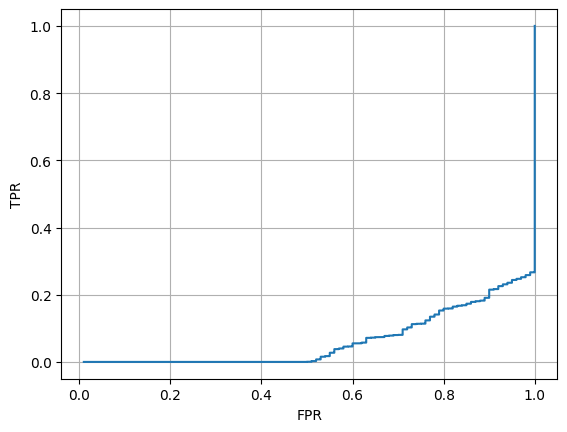

In [96]:
import matplotlib.pyplot as plt
plt.plot(tpr_array,fpr_array)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()

plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [53]:
 # write your code

c_5 = pd.read_csv("5_c.csv")
c_5.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [54]:
c_5['y'].value_counts()

y
0    1805
1    1047
Name: count, dtype: int64

In [71]:
data = c_5.sort_values('prob',ascending=False)
metric_a = []
for threshold in data['prob'].unique():
    data['pred'] = np.where(data['prob'] < threshold,0,1)
    
    FP = ((data['y'] == 0) & (data['pred'] == 1)).sum()
    FN = ((data['y'] == 1) & (data['pred'] == 0)).sum()

    a_value = (500*FN) + (100*FP)
    metric_a.append(a_value)


threshold_metric_df = pd.DataFrame({'threshold':data['prob'].unique(),'A':metric_a})

print("the lowest value of metric A is at threshold   ",threshold_metric_df[threshold_metric_df['A'] == min(threshold_metric_df['A'])]['threshold'].values[0])

    

the lowest value of metric A is at threshold    0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [72]:
d_5 = pd.read_csv("5_d.csv")
d_5.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [77]:
def mse(data):
    '''Mean sqaured error computation'''

    n = data.shape[0]
    error_summation = 0
    for index,row in data.iterrows():
        actual = row['y']
        predicted = row['pred']
        squared_error = (actual - predicted) * (actual - predicted)
        error_summation += squared_error
        
    mse_value = (1/n) * (error_summation)

    return  mse_value


def r_sqaured_error(data):
    '''r sqaured error computation'''

    y_mean = data['y'].mean()
    n = data.shape[0]
    simple_mean_error_summation = 0
    residual_error_summation = 0

    for index,row in data.iterrows():
        actual = row['y']
        mean_squared_error = (actual - y_mean) * (actual - y_mean)
        simple_mean_error_summation += mean_squared_error 

    for index,row in data.iterrows():
        actual = row['y']
        predicted = row['pred']
        squared_error = (actual - predicted) * (actual - predicted)
        residual_error_summation += squared_error 


    ss_total = (1/n)*(simple_mean_error_summation)
    ss_res = (1/n)*(residual_error_summation)

    return 1-(ss_res/ss_total)


def mape(data):
    '''mape computation'''
    abs_error_summation = 0

    for index,row in data.iterrows():
        actual = row['y']
        predicted = row['pred']
        abs_error = abs(predicted - actual)
        abs_error_summation += abs_error
    
    actual_values_summation = data['y'].sum()
    mape_value = abs_error_summation/actual_values_summation

    return mape_value



mse_value = mse(d_5)
r_sqaured_value = r_sqaured_error(d_5)
mape_value = mape(d_5)

print("The MSE on the given data is ",mse_value)
print("The R sqaured value on the given data is ",r_sqaured_value)
print("the mape value on the given data is ",mape_value)






The MSE on the given data is  177.16569974554707
The R sqaured value on the given data is  0.9563582786990964
the mape value on the given data is  0.1291202994009687
